In [390]:
import ujson as uj
import pandas as pd

In [391]:
file = '../dataset/tree.ndjson'

records = map(uj.loads, open(file, encoding='utf8'))
df = pd.DataFrame.from_records(records)

In [392]:
import cairocffi as cairo
from itertools import chain

def convert_to_png(data):
    surface = cairo.SVGSurface(None, 256, 256)
    ctx = cairo.Context(surface)
    ctx.set_source_rgb(1, 1, 1)
    ctx.rectangle(0, 0, 255, 255)
    ctx.fill()
    ctx.set_line_width(1)
    ctx.set_source_rgb(0, 0, 0)
    xs = list(map(lambda stroke: stroke[0], data))
    ys = list(map(lambda stroke: stroke[1], data))
    max_x = max(chain(*xs))
    max_y = max(chain(*ys))
    add_x = int((255 - max_x) / 2)
    add_y = int((255 - max_y) / 2)
    for stroke in data:
        ctx.move_to(stroke[0][0] + add_x, stroke[1][0] + add_y)
        for i in range(1, len(stroke[0])):
            ctx.line_to(stroke[0][i] + add_x, stroke[1][i] + add_y)
        ctx.stroke()
    surface.flush()
    return surface.write_to_png(None)

def convert_many(drawings):
    surface = cairo.SVGSurface(None, 256, 256)
    ctx = cairo.Context(surface)
    ctx.set_source_rgb(1, 1, 1)
    ctx.rectangle(0, 0, 255, 255)
    ctx.fill()
    ctx.set_line_width(1)
    ctx.set_source_rgba(0, 0, 0, max(1/len(drawings), 0.04))
    for drawing in drawings:
        xs = list(map(lambda stroke: stroke[0], drawing))
        ys = list(map(lambda stroke: stroke[1], drawing))
        max_x = max(chain(*xs))
        max_y = max(chain(*ys))
        add_x = int((255 - max_x) / 2)
        add_y = int((255 - max_y) / 2)
        for stroke in drawing:
            ctx.move_to(stroke[0][0] + add_x, stroke[1][0] + add_y)
            for i in range(1, len(stroke[0])):
                ctx.line_to(stroke[0][i] + add_x, stroke[1][i] + add_y)
            ctx.stroke()
    surface.flush()
    return surface.write_to_png(None)

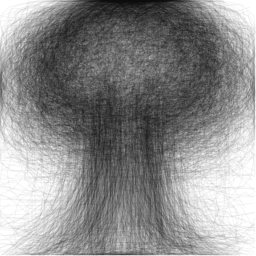

In [394]:
from IPython.display import Image
import random
drawings = df[df['recognized'] == True]['drawing'].sample(1000)
Image(convert_many(drawings))